In [374]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from skimage import transform
from skimage import data
from skimage.color import rgb2gray

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
np.random.seed(123)  # for reproducibility

output_categories = 2

<a id='exploration'></a>
## Loading And Exploring The Data

In [375]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".PNG")]
        for f in file_names:
            images.append(data.imread(f))
            labels.append(int(d))
    return images, labels

# ROOT_PATH = "C:/Users/Mike/Documents/GitHub/SetCardGameGenerator/SetCardGameGenerator/REAL/"
ROOT_PATH = "C:/Users/Stebbins/Documents/GitHub/SetCardGameGenerator/"

# small directory of images for testing algorithms
data_dir = os.path.join(ROOT_PATH, "NN_data_test")

# # real directory of images for training/testing
# data_dir = os.path.join(ROOT_PATH, "NN_data")

X, y = load_data(data_dir)

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

316
316
106
106


In [376]:
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
X_test_array = np.array(X_test)
y_test_array = np.array(y_test)

# Print the `images` dimensions
print(X_train_array.ndim)

# Print the number of `images`'s elements
print(X_train_array.size)

# Print the first instance of `images`
# print(images_array[0])

# Print the `labels` dimensions
print(y_train_array.ndim)

# Print the number of `labels`'s elements
print(y_train_array.size)

# Count the number of labels
print(len(set(y_train_array)))

4
13378176
1
316
2


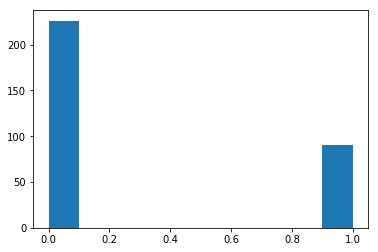

In [377]:
# Make a histogram with 2 bins of the `labels` data
plt.hist(y_train, 10)

# Show the plot
plt.show()

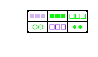

shape: (72, 196, 3), min: 0, max: 255


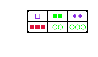

shape: (72, 196, 3), min: 0, max: 255


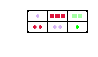

shape: (72, 196, 3), min: 0, max: 255


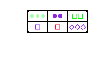

shape: (72, 196, 3), min: 0, max: 255


In [378]:
# Determine the (random) indexes of the images
sample_images = [1, 2, 3, 5]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(sample_images)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(X_train[sample_images[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[sample_images[i]].shape, 
                                                  images[sample_images[i]].min(), 
                                                  images[sample_images[i]].max()))

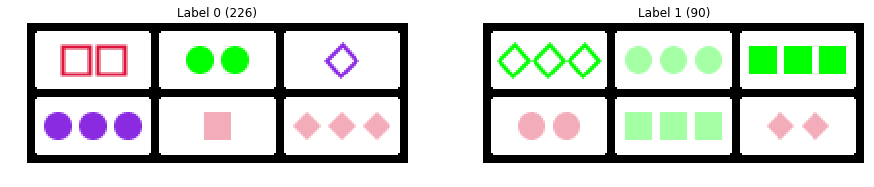

In [379]:
# Get the unique labels 
unique_labels = set(y_train)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = X_train[y_train.index(label)]
    # Define subplots 
    plt.subplot(1, 2, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, y_train.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

<a id='extraction'></a>
## Feature Extraction
### Rescaling Images

In [380]:
# Resize images
X_train = [transform.resize(image, (36, 98)) for each in X_train]
X_train_array = np.array(X_train)
print(X_train_array.ndim)
print(X_train_array.shape)

X_test = [transform.resize(image, (36, 98)) for each in X_test]
X_test_array = np.array(X_test)

C:\Users\Stebbins\Anaconda3_64\envs\py35\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


4
(316, 36, 98, 3)


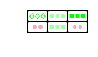

shape: (36, 98, 3), min: 0.0, max: 1.0


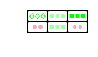

shape: (36, 98, 3), min: 0.0, max: 1.0


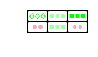

shape: (36, 98, 3), min: 0.0, max: 1.0


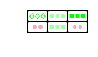

shape: (36, 98, 3), min: 0.0, max: 1.0


In [381]:
# Determine the (random) indexes of the images
sample_images = [1, 2, 3, 5]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(sample_images)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(X_train_array[sample_images[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(X_train_array[sample_images[i]].shape, 
                                                 X_train_array[sample_images[i]].min(), 
                                                 X_train_array[sample_images[i]].max()))

### Image Conversion to Grayscale 

In [382]:
X_train_array = rgb2gray(np.array(X_train_array))
X_test_array = rgb2gray(np.array(X_test_array))

(316, 36, 98)
3
(36, 98)
2


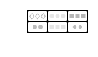

shape: (36, 98), min: 0.0, max: 1.0


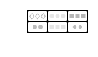

shape: (36, 98), min: 0.0, max: 1.0


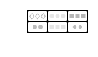

shape: (36, 98), min: 0.0, max: 1.0


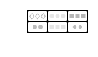

shape: (36, 98), min: 0.0, max: 1.0


In [383]:
print(X_train_array.shape)
print(X_train_array.ndim)
print(X_train_array[set_hands[i]].shape)
print(X_train_array[set_hands[i]].ndim)

# images32 = np.expand_dims(images32,2)

# print(images32[set_hands[i]].shape)
# print(images32[set_hands[i]].ndim)

# for i in range(len(sample_images)):
#     plt.subplot(1, 4, i+1)
#     plt.axis('off')
#     plt.imshow(X_train_array[sample_images[i]], cmap="gray")
#     plt.subplots_adjust(wspace=0.5)
        
# plt.show()

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(sample_images)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(X_train_array[sample_images[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(X_train_array[sample_images[i]].shape, 
                                                 X_train_array[sample_images[i]].min(), 
                                                 X_train_array[sample_images[i]].max()))

### Modeling The Neural Network

In [384]:
print (X_train_array.shape)
# Reshape input data
X_train_array = X_train_array.reshape(X_train_array.shape[0], 1, 36, 98)
print (X_train_array.shape)
X_test_array = X_test_array.reshape(X_test_array.shape[0], 1, 36, 98)

print (y_train_array.shape)
print (y_train_array[:5])
# The y_train and y_test data are not split into 10 distinct class labels, 
# but rather are represented as a single array with the class values.

(316, 36, 98)
(316, 1, 36, 98)
(316,)
[0 0 0 0 1]


In [385]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train_array = np_utils.to_categorical(y_train_array, 2)
print (y_train_array.shape)
y_test_array = np_utils.to_categorical(y_test_array, 2)

(316, 2)


In [386]:
# shape triple-check
print(X_train_array.shape)
print(y_train_array.shape)

(316, 1, 36, 98)
(316, 2)


In [387]:
model = Sequential()

# CNN input layer
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(1,36,98), 
                        dim_ordering='th'))
# The input shape parameter should be the shape of 1 sample. In this case, 
# it's the same (1, 28, 28) that corresponds to  the (depth, width, height) 
# of each digit image.

# But what do the first 3 parameters represent? They correspond to the number 
# of convolution filters to use, the number of rows in each convolution kernel,
# and the number of columns in each convolution kernel, respectively.

C:\Users\Stebbins\Anaconda3_64\envs\py35\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), data_format="channels_first", input_shape=(1, 36, 98..., activation="relu")`
  """


In [388]:
print (model.output_shape)

(None, 32, 34, 96)


In [389]:
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

C:\Users\Stebbins\Anaconda3_64\envs\py35\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [390]:
# Fully connected dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(output_categories, activation='softmax'))

In [391]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Running The Neural Network

In [392]:
# Fit Keras model
model.fit(X_train_array, y_train_array, 
          batch_size=32, epochs=3, verbose=1)

Epoch 1/3
316/316 [==============================] - 2s - loss: 0.7640 - acc: 0.5728     
Epoch 2/3
316/316 [==============================] - 1s - loss: 0.6086 - acc: 0.7152     
Epoch 3/3
316/316 [==============================] - 1s - loss: 0.6195 - acc: 0.7152     


### Evaluating The Neural Network

In [402]:
# Pick 10 random images
sample_indexes = random.sample(range(len(X_test_array)), 10)
sample_images = [X_test_array[i] for i in sample_indexes]
sample_labels = [y_test[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = model.predict(X_test_array,batch_size=32)

In [403]:
## Print the real and predicted labels
predicted_label = []
for i in range (0, len(sample_indexes)):
    predicted_label.append(np.argmax(predicted[sample_indexes[i]]))
#     print("truth = ", sample_labels[i], "  prediction = ", np.argmax(predicted[sample_indexes[i]]))
print(sample_labels)
print(predicted_label)

[0, 1, 1, 1, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


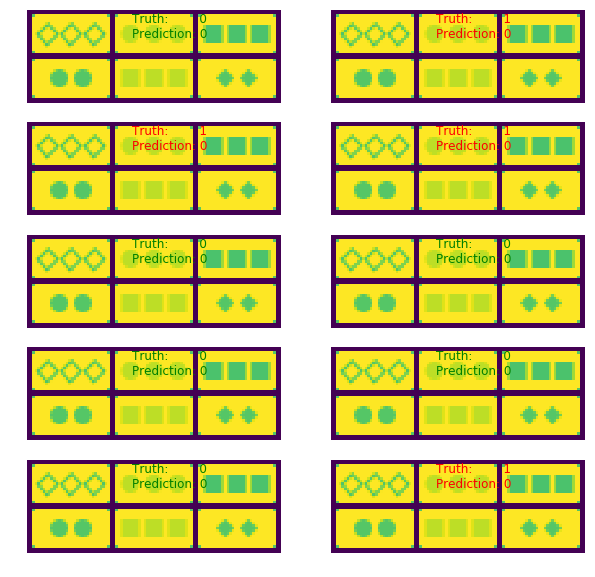

In [404]:
# Display the predictions and the truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted_label[i]
    image = X_test_array[sample_indexes[i]]
    image = np.squeeze(image)
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(image)
plt.show()

In [416]:
# # Load the test data
# test_images, test_labels = load_data(test_data_dir)

# ## Transform the images to 28 by 28 pixels
# test_images28 = [transform.resize(image, (36, 98)) for image in test_images]

# print(test_images.size)

# # Convert to grayscale
# from skimage.color import rgb2gray
# # test_images28 = rgb2gray(np.array(test_images28))
# test_images28 = rgb2gray(np.array(test_images))

# print(test_images.size)

# # Run predictions against the full test set.
# predicted = sess.run([correct_pred], feed_dict={x: test_images28})[0]

print(np.ndim(y_test))
print(y_test[0])
print("---------------")

print(np.ndim(y_test_array))
print(y_test_array[0])
print("---------------")

print(np.ndim(predicted))
print(predicted[0])
print("---------------")

print(np.ndim(predicted_label))
print(predicted_label[0])
print("---------------")

predicted = np.array(predicted)

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(y_test, predicted_label)])

# Calculate the accuracy
accuracy = match_count / len(y_test_array)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

1
0
---------------
2
[ 1.  0.]
---------------
2
[ 0.67401427  0.3259857 ]
---------------
1
0
---------------
Accuracy: 0.066
